Home Loan Data Analysis
Problem Statement:  
For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.
Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data
Domain: Finance
Analysis to be done: Perform data preprocessing and build a deep learning prediction model

Steps to be done: 

	•	Load the dataset that is given to you
	•	Check for null values in the dataset
	•	Print the percentage of default to a payer of the dataset for the TARGET column
	•	Balance the dataset if the data is imbalanced
	•	Plot the balanced or imbalanced data
	•	Encode the columns that are required for the model
	•	Calculate sensitivity as a metric
	•	Calculate the area under the receiver operating characteristics curve




## EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('loan_data1.csv')

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 536.7 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [5]:
df.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [6]:
df.groupby(["TARGET"]).count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,
0,282686,282686,282686,282686,282686,282686,282686,282686,282674,282429,...,282686,282686,282686,282686,245459,245459,245459,245459,245459,245459
1,24825,24825,24825,24825,24825,24825,24825,24825,24825,24804,...,24825,24825,24825,24825,20533,20533,20533,20533,20533,20533


### Observations:

   __* The dataset has 122 columns and 307511 rows.__
   
   __* The dataset has 16 categorical columns and 106 numerical columns.__
   
   __* The dataset has missing values in several columns:__
         50 columns that has 47% - 70% of missing values
         8 columns has 13% - 32% of missing values 
         10 columns has less than 10% of missing values
         
   __* The dataset is highly imbalanced with only 8.1% of the data belonging to the TARGET class 1 (default).__

## Missing values

In [7]:
missing_values_columns = ['COMMONAREA_MEDI',
                        'COMMONAREA_AVG',
                        'COMMONAREA_MODE',
                        'NONLIVINGAPARTMENTS_MODE',
                        'NONLIVINGAPARTMENTS_AVG',
                        'NONLIVINGAPARTMENTS_MEDI',
                        'FONDKAPREMONT_MODE',
                        'LIVINGAPARTMENTS_MODE',
                        'LIVINGAPARTMENTS_AVG',
                        'LIVINGAPARTMENTS_MEDI',
                        'FLOORSMIN_AVG',
                        'FLOORSMIN_MODE',
                        'FLOORSMIN_MEDI',
                        'YEARS_BUILD_MEDI',
                        'YEARS_BUILD_MODE',
                          'YEARS_BUILD_AVG',
                          'OWN_CAR_AGE',
                          'LANDAREA_MEDI',
                          'LANDAREA_MODE',
                          'LANDAREA_AVG',
                          'BASEMENTAREA_MEDI',
                          'BASEMENTAREA_AVG',
                          'BASEMENTAREA_MODE',
                          'EXT_SOURCE_1',
                          'NONLIVINGAREA_MODE',
                          'NONLIVINGAREA_AVG',
                          'NONLIVINGAREA_MEDI',
                          'ELEVATORS_MEDI',
                          'ELEVATORS_AVG',
                          'ELEVATORS_MODE',
                          'WALLSMATERIAL_MODE',
                          'APARTMENTS_MEDI',
                          'APARTMENTS_AVG',
                          'APARTMENTS_MODE',
                          'ENTRANCES_MEDI',
                          'ENTRANCES_AVG',
                          'ENTRANCES_MODE',
                          'LIVINGAREA_AVG',
                          'LIVINGAREA_MODE',
                          'LIVINGAREA_MEDI',
                          'HOUSETYPE_MODE',
                          'FLOORSMAX_MODE',
                          'FLOORSMAX_MEDI',
                          'FLOORSMAX_AVG',
                          'YEARS_BEGINEXPLUATATION_MODE',
                          'YEARS_BEGINEXPLUATATION_MEDI',
                          'YEARS_BEGINEXPLUATATION_AVG',
                          'YEARS_BUILD_MEDI',
                          'YEARS_BUILD_MODE', 
                          'YEARS_BUILD_AVG',
                          'TOTALAREA_MODE',
                          'EMERGENCYSTATE_MODE',
                          'OCCUPATION_TYPE',
                          'EXT_SOURCE_3',
                          'AMT_REQ_CREDIT_BUREAU_HOUR',
                          'AMT_REQ_CREDIT_BUREAU_DAY',
                          'AMT_REQ_CREDIT_BUREAU_WEEK',
                          'AMT_REQ_CREDIT_BUREAU_MON',
                          'AMT_REQ_CREDIT_BUREAU_QRT',
                          'AMT_REQ_CREDIT_BUREAU_YEAR',

                          'TARGET'
                          ]


In [8]:
mdf = df[missing_values_columns]

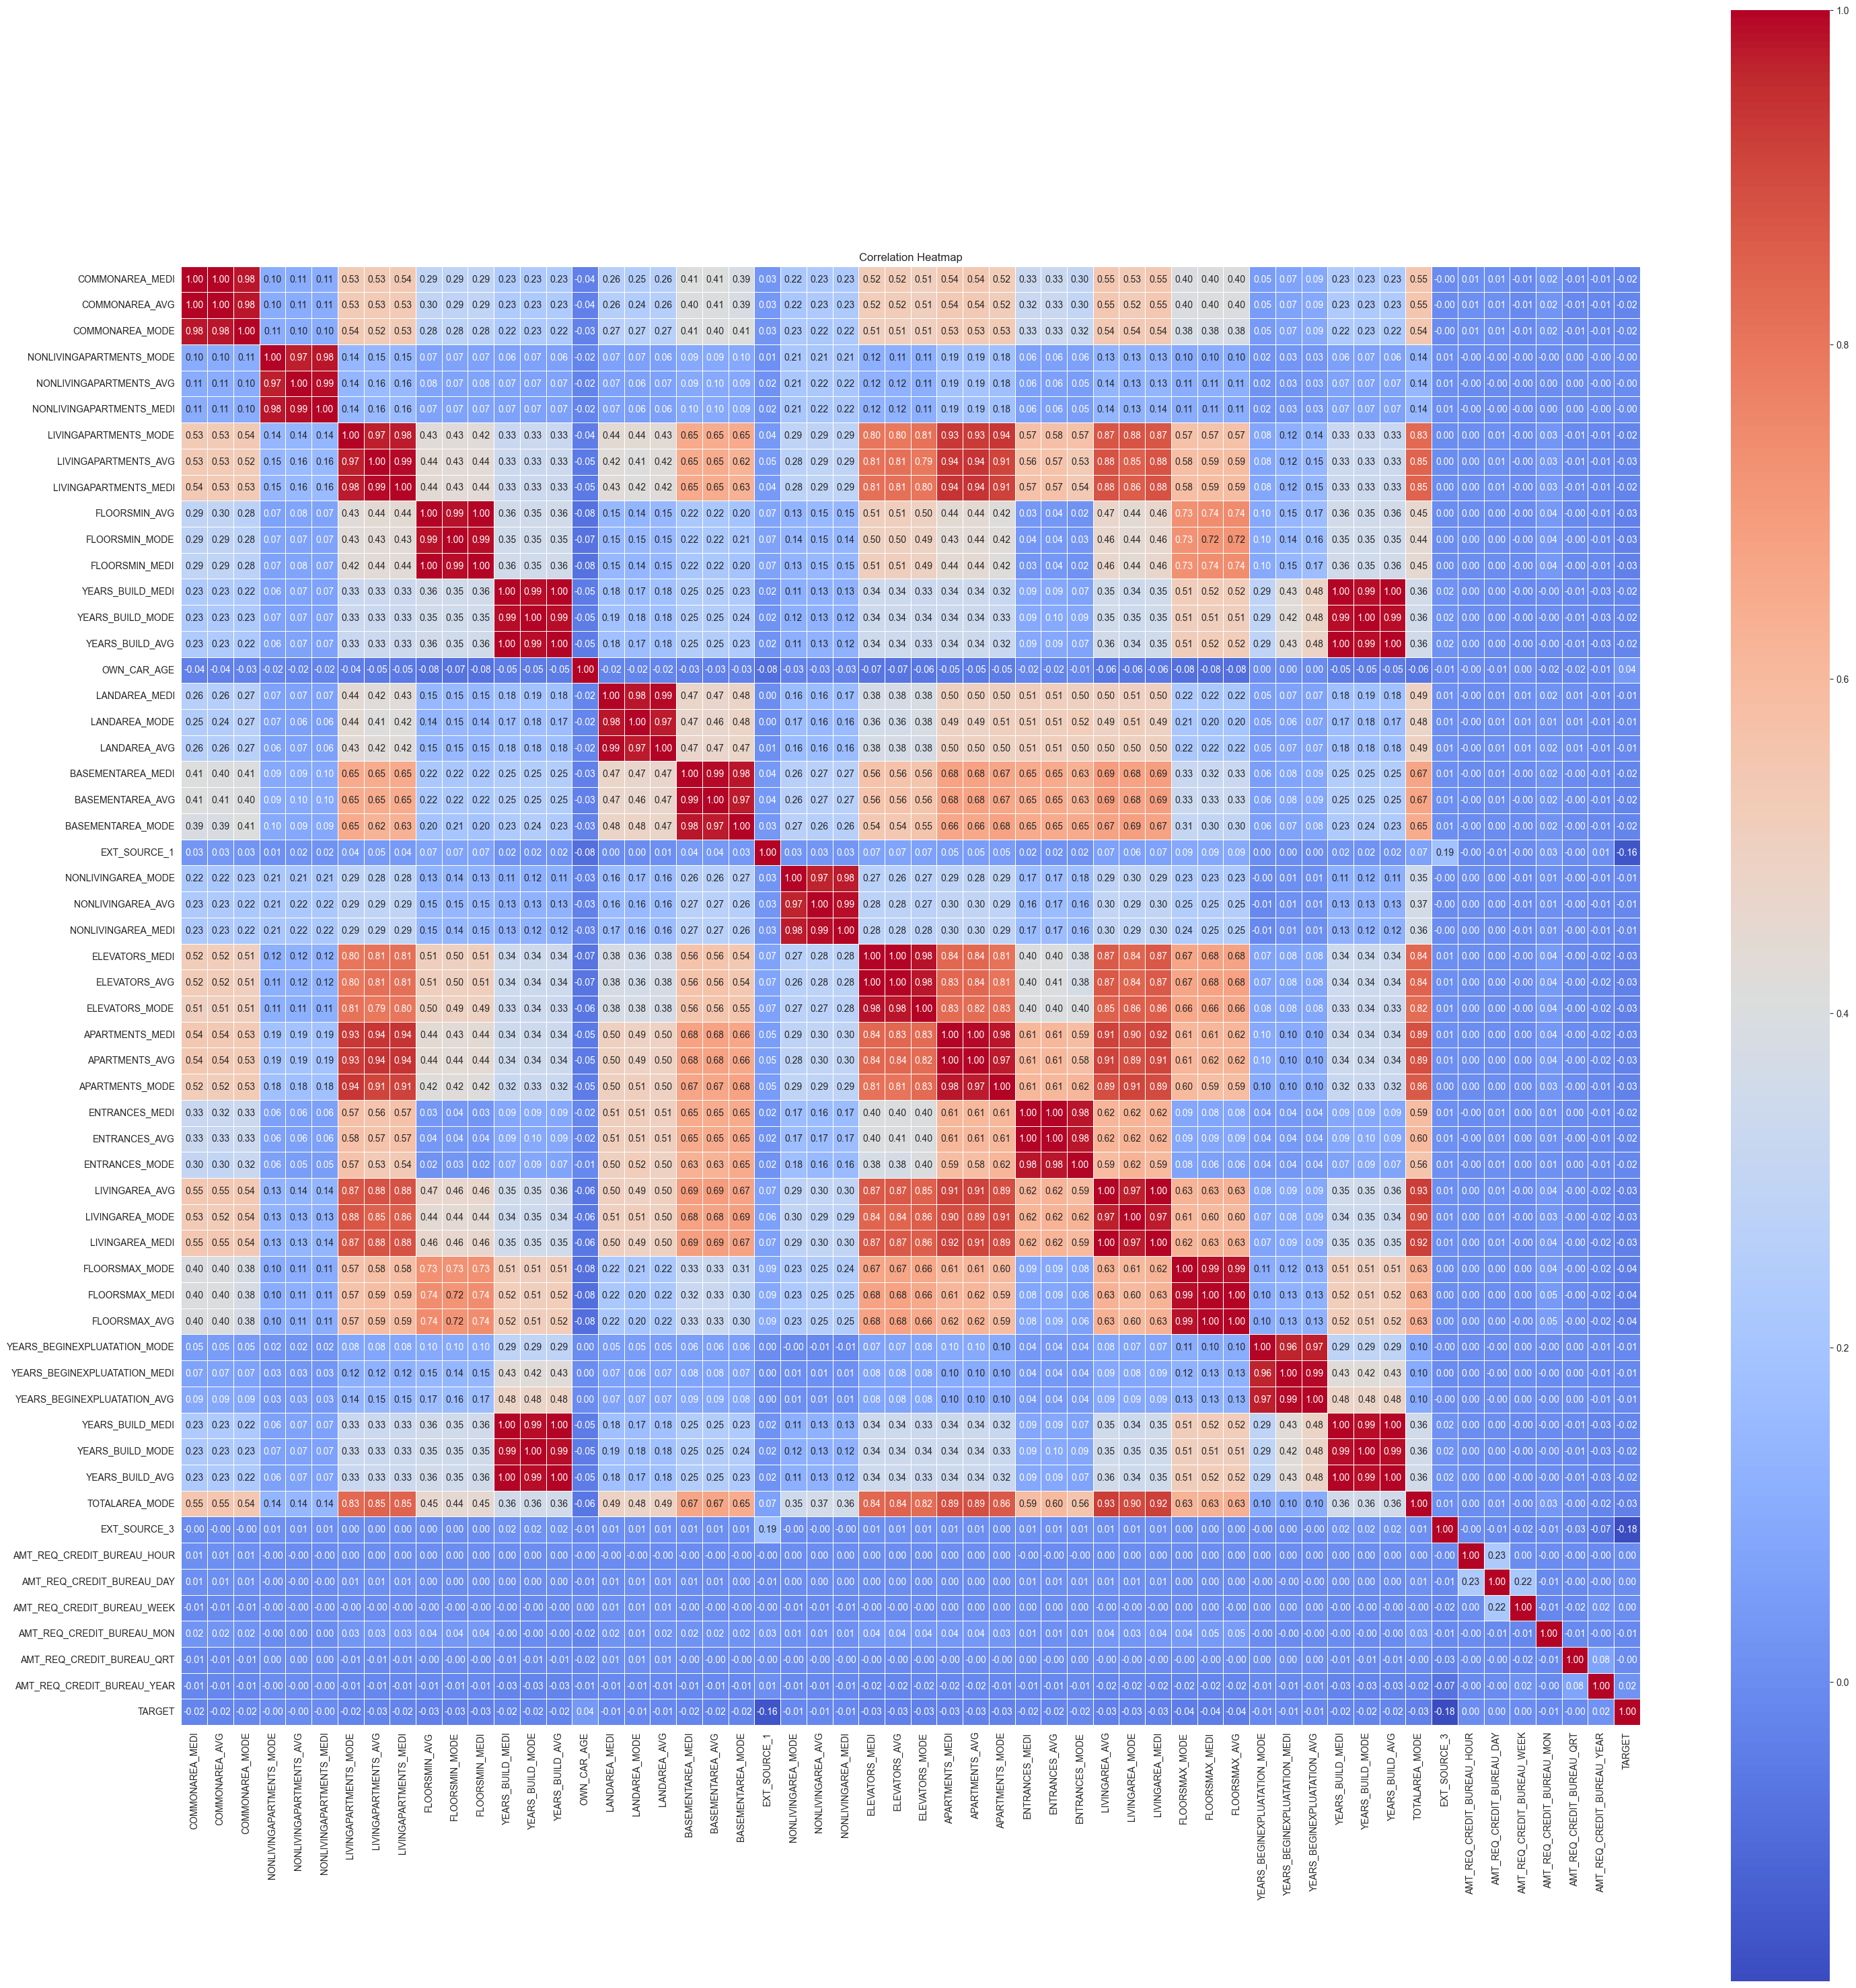

In [9]:
corr = mdf.corr(numeric_only=True)
# Generate heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Observations:

   __* The columns with high percent of missing values doesn't have a correlation bigger than 0.1 except columns EXT_SOURCE_1, EXT_SOURCE_3.__
   

array([[<Axes: title={'center': 'EXT_SOURCE_1'}>,
        <Axes: title={'center': 'EXT_SOURCE_3'}>]], dtype=object)

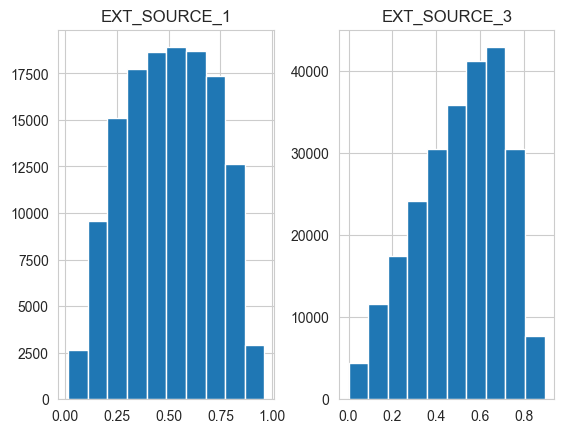

In [10]:
df[['EXT_SOURCE_1', 'EXT_SOURCE_3']].hist()

In [11]:
df2 = df.drop(['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_1', 'EXT_SOURCE_3'
    ], axis=1)


In [12]:
df2.isnull().mean().sort_values(ascending=False)

NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
                                 ...   
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
TARGET                         0.000000
FLAG_DOCUMENT_21               0.000000
Length: 65, dtype: float64

## Feature Engineering

In [13]:
from sklearn.model_selection import train_test_split
X = df2.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df2['TARGET']

In [14]:
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.scaling import MeanNormalizationScaler
categorical_cols = X.select_dtypes(include=['object']).columns.to_list()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()

transformers = [
    MeanMedianImputer(imputation_method='mean', variables=numerical_cols), 
    MeanNormalizationScaler(variables=numerical_cols),
    CategoricalImputer(imputation_method='frequent', variables=categorical_cols),
    OrdinalEncoder(encoding_method='ordered', variables=categorical_cols)
]
X_prep = X.copy()
for t in transformers:
    X_prep = t.fit_transform(X_prep, y)
    

In [15]:
print(f'Check missing values: {X_prep.isnull().sum().sum()}')

Check missing values: 0


In [16]:
X_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_CONTRACT_TYPE,307511.0,9.047871e-01,0.293509,0.000000,1.000000,1.000000,1.000000,1.000000
CODE_GENDER,307511.0,1.341630e+00,0.474284,0.000000,1.000000,1.000000,2.000000,2.000000
FLAG_OWN_CAR,307511.0,6.598918e-01,0.473746,0.000000,0.000000,1.000000,1.000000,1.000000
FLAG_OWN_REALTY,307511.0,3.063273e-01,0.460968,0.000000,0.000000,0.000000,1.000000,1.000000
CNT_CHILDREN,307511.0,-5.848771e-19,0.038006,-0.021950,-0.021950,-0.021950,0.030681,0.978050
...,...,...,...,...,...,...,...,...
FLAG_DOCUMENT_17,307511.0,1.328610e-19,0.016327,-0.000267,-0.000267,-0.000267,-0.000267,0.999733
FLAG_DOCUMENT_18,307511.0,1.048446e-18,0.089798,-0.008130,-0.008130,-0.008130,-0.008130,0.991870
FLAG_DOCUMENT_19,307511.0,3.119344e-19,0.024387,-0.000595,-0.000595,-0.000595,-0.000595,0.999405
FLAG_DOCUMENT_20,307511.0,2.072342e-19,0.022518,-0.000507,-0.000507,-0.000507,-0.000507,0.999493


In [17]:
from imblearn.over_sampling import ADASYN


X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42, stratify=y)

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [18]:
y_resampled.value_counts(normalize=True)

TARGET
1    0.502974
0    0.497026
Name: proportion, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64

## Model Training

In [27]:
import time
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_auc(clf):
    y_probabilities = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probabilities)
    roc_auc = roc_auc_score(y_test, y_probabilities)
    
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def train_model(clf):
    t1 = time.time()
    clf.fit(X_resampled, y_resampled)
    t2 = time.time()
    print(f"Training time: {t2-t1:.2f} seconds")

def calculate_accuracy(clf):
    print(f"Train score: {clf.score(X_resampled, y_resampled)}")
    print(f"Test score: {clf.score(X_test, y_test)}")
    cv_scores = cross_val_score(clf, X_prep, y, cv=5)
    print(f"Cross-validation score: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

def predictict(clf):
    t0 = time.time()
    y_pred = clf.predict(X_test)
    t1 = time.time()
    print(f"Inference time: {t1-t0:.2f} seconds")
    return y_pred

def fit(clf):
    train_model(clf)
    calculate_accuracy(clf)
    y_pred = predictict(clf)

    print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
    plot_roc_auc(clf)

Decision Tree:
Training time: 6.81 seconds
Train score: 0.7580186460718854
Test score: 0.739085898248866
Cross-validation score: 0.92 (+/- 0.00)
Inference time: 0.03 seconds
Confusion matrix: [[43980 12558]
 [ 3489  1476]]


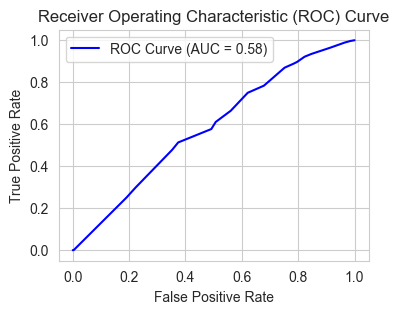

Random Forest:
Training time: 180.11 seconds
Train score: 1.0
Test score: 0.9180202591743493
Cross-validation score: 0.92 (+/- 0.00)
Inference time: 2.47 seconds
Confusion matrix: [[56425   113]
 [ 4929    36]]


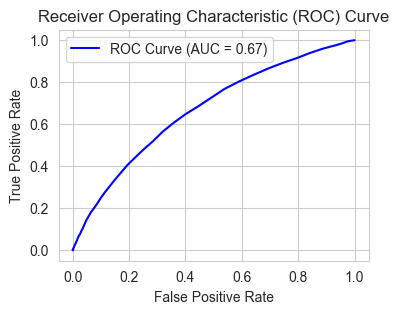

Nearest Neighbors:
Training time: 0.39 seconds
Train score: 0.8772444956285906
Test score: 0.6498382192738565
Cross-validation score: 0.91 (+/- 0.00)
Inference time: 40.10 seconds
Confusion matrix: [[37944 18594]
 [ 2942  2023]]


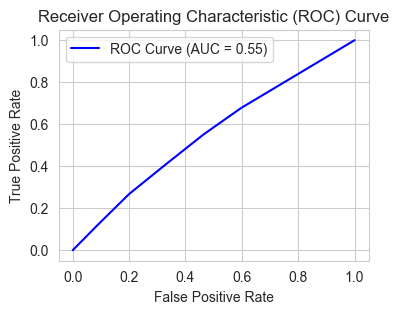

Gradient Boosting:
Training time: 310.02 seconds
Train score: 0.9304376684058532
Test score: 0.9128335203160821
Cross-validation score: 0.92 (+/- 0.00)
Inference time: 0.19 seconds
Confusion matrix: [[56021   517]
 [ 4844   121]]


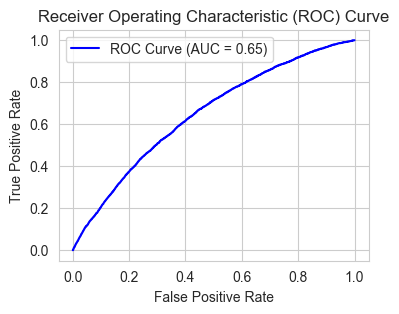

Logistic Regression:


/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training time: 361.31 seconds
Train score: 0.6669047608581941
Test score: 0.6550412175015853


/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/apoltavets/.virtualenvs/ml-and-engineering-docs/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: Convergence

Cross-validation score: 0.92 (+/- 0.00)
Inference time: 0.03 seconds
Confusion matrix: [[37300 19238]
 [ 1978  2987]]


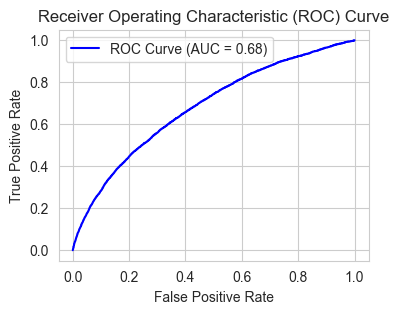

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


algorithms = [
                ('Decision Tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
                ('Random Forest', RandomForestClassifier()), 
                ('Nearest Neighbors', KNeighborsClassifier()), 
                ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
                ('Logistic Regression', LogisticRegression(penalty="l1",
                                                        solver="saga",
                                                        max_iter=500,
                                                        random_state=42))

]

for name, clf in algorithms:
    print(f'{name}:')
    fit(clf)
 
       

### Observations:

    The dataset was highly imbalanced, and the ADASYN technique was used to balance the classes.

    The Random Forest and Gradient Boosting classifiers performed the best in terms of accuracy but ROC AUC score is about 0.65 score.

    Further hyperparameter tuning could potentially improve model performance.

In [25]:
from keras import Sequential    
from keras.layers import Dense, Input
from keras.optimizers import Adam

def train_seq_model(hidden_layer_sizes):
    print(f"Training Sequential Model with hidden layers: {hidden_layer_sizes}")
    model = Sequential([Input(shape=(63,))])
    for units in hidden_layer_sizes:
        model.add(Dense(units, activation="relu"))
    
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    train_model(model)
    y_pred = predictict(model)
    
    print(f"Train score: {model.evaluate(X_resampled, y_resampled, verbose=0)[1]}")
    print(f"Test score:{model.evaluate(X_test, y_test, verbose=0)[1]}")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Training Sequential Model with hidden layers: [256, 128, 64, 32, 16, 8, 4]
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.6378 - loss: 0.6321
Training time: 58.71 seconds
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Inference time: 6.60 seconds
Train score: 0.7142605781555176
Test score:0.686421811580658


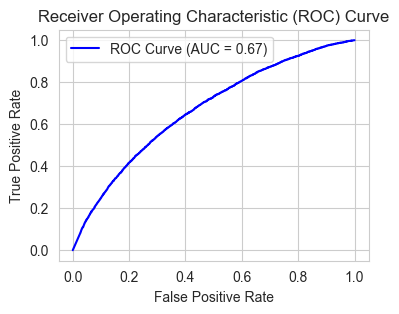

Training Sequential Model with hidden layers: [512, 256, 128, 64, 32, 16, 8, 4]
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 87s 6ms/step - accuracy: 0.6365 - loss: 0.6313
Training time: 87.36 seconds
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Inference time: 3.66 seconds
Train score: 0.7093551158905029
Test score:0.7253955006599426


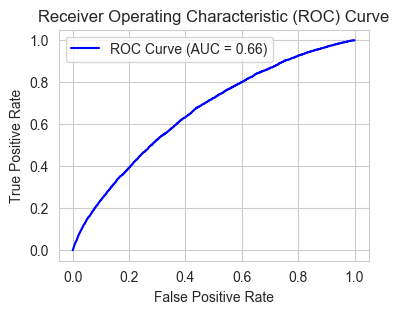

Training Sequential Model with hidden layers: [1024, 768, 512, 256, 128, 64, 32, 16, 8, 4]
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 285s 20ms/step - accuracy: 0.6400 - loss: 0.6319
Training time: 285.41 seconds
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Inference time: 5.76 seconds
Train score: 0.6840980648994446
Test score:0.5301855206489563


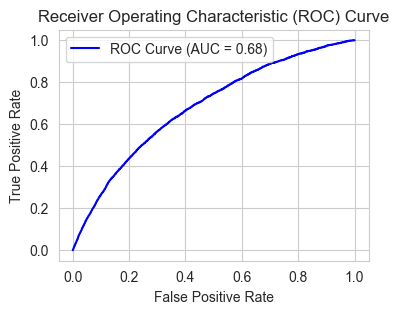

Training Sequential Model with hidden layers: [2048, 1024, 768, 512, 256, 128, 64, 32, 16, 8, 4]
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 6825s 480ms/step - accuracy: 0.6228 - loss: 0.6512
Training time: 6825.53 seconds
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
Inference time: 14.61 seconds
Train score: 0.5029736161231995
Test score:0.08072777092456818


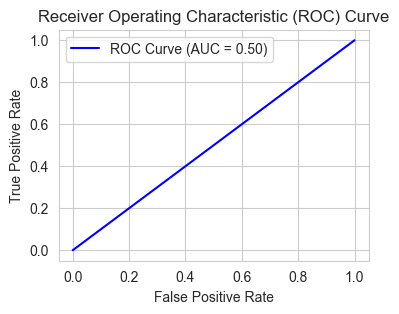

Training Sequential Model with hidden layers: [256, 256, 256, 256, 256, 256, 256, 256, 128, 64, 32, 16, 8, 4]
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 91s 6ms/step - accuracy: 0.5011 - loss: 0.6932
Training time: 90.84 seconds
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Inference time: 4.65 seconds
Train score: 0.49702638387680054
Test score:0.919272243976593


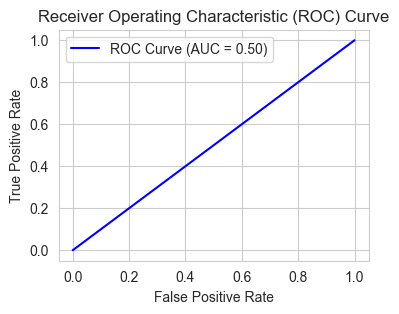

In [30]:
hidden_layers = [
    [256, 128, 64, 32, 16, 8, 4],
    [512, 256, 128, 64, 32, 16, 8, 4],
    [1024, 768, 512, 256, 128, 64, 32, 16, 8, 4],
    [2048, 1024, 768, 512, 256, 128, 64, 32, 16, 8, 4],
    [256, 256, 256, 256, 256, 256, 256, 256, 128, 64, 32, 16, 8, 4]
]

for hl in hidden_layers:
    train_seq_model(hl)


### Observations:

    The Sequential model with deep layers performed a bit better than the traditional machine learning models, achieving a ROC AUC score of around 0.68. The best architecture was the one with [1024, 768, 512, 256, 128, 64, 32, 16, 8, 4] hidden layers.
    
    The best model in terms of test/train score with [256, 128, 64, 32, 16, 8, 4] and ROC AUC score 0.66.
